In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
# Please download the three correpsonding dataset and specify your own path in your google drive
authors_features_path = "/content/drive/MyDrive/NIRW/authorsFeatures.csv"
authors_fields_path = "/content/drive/MyDrive/NIRW/authorsFields.csv"
coauthorship_path = "/content/drive/MyDrive/NIRW/coauthorship.csv"

authors_features_table = pd.read_csv(authors_features_path)
authors_fields_table = pd.read_csv(authors_fields_path)
coauthorship_table = pd.read_csv(coauthorship_path)

In [ ]:
def get_basic_info(df, name):
    print(f"Basic Information for {name}:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nSummary Statistics (if numeric columns):")
    print(df.describe())
    print("\n" + "-"*50 + "\n")

# Basic information for each dataset
get_basic_info(authors_features_table, "Authors Features")
get_basic_info(authors_fields_table, "Authors Fields")
get_basic_info(coauthorship_table, "Coauthorship")

Basic Information for Authors Features:
Shape: (556932, 6)
Columns: ['Author ID', 'Institute ID', 'Citation Count', 'h-index', 'Gender', 'Country']

First 5 Rows:
      Author ID          Institute ID  Citation Count  h-index  Gender Country
0  QcRldecAAAAJ  17508113656414128510            1280       16    male      ID
1  rkKMIwMAAAAJ   4065822778065209794            1034       18    male      US
2  AUb2dK4AAAAJ   4396926741242628134             111        7  female      US
3  tWHbwOMAAAAJ   7143928649000768301             161        4    male      US
4  c28QSJkAAAAJ  10680603084482565841             315        9    male      US

Summary Statistics (if numeric columns):
       Institute ID  Citation Count        h-index
count  5.569320e+05    5.569320e+05  556932.000000
mean   9.195048e+18    3.280476e+03      18.913496
std    5.316114e+18    9.537221e+03      18.005313
min    9.878469e+15    1.000000e+00       1.000000
25%    4.497257e+18    2.220000e+02       7.000000
50%    9.160473

In [ ]:
def create_graph_from_df(df):
    """
    This function creats a directed graph from the input DataFrame.
    """
    G = nx.Graph()
    for index, row in df.iterrows():
        G.add_edge(row['Author ID'], row['Co-author ID'])
    return G

def visualize_network_from_df(G):
    """
    This function creates a visualization of input graph G.
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=10, node_color="blue", edge_color="gray", alpha=0.7)

    # Optionally, draw node labels for a subset of nodes (if the graph is too dense)
    # nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

    # Show the plot
    plt.title('Co-authorship Network Visualization')
    plt.show()

In [ ]:
%%time
coauthorship_graph = create_graph_from_df(coauthorship_table)

CPU times: user 19.1 s, sys: 112 ms, total: 19.2 s
Wall time: 19.4 s


In [ ]:
# ------- Helper function limited to directed graphs DG -------
def calculate_in_degree_centrality(DG):
    return nx.in_degree_centrality(DG)

def calculate_out_degree_centrality(DG):
    return nx.out_degree_centrality(DG)

# -------- Helper function limited to undirected graph G -------
def calculate_degree_centrality(G):
    return nx.degree_centrality(G)

def get_num_of_cc(G):
    return nx.number_connected_components(G)

# -------- General helper functions for all graph G --------
def calculate_diameter(G):
    """
    This function computes the diameter of given graph G, whether directed or undirected
    It returns the distance of teh largest component for directed graph if it is not strongly connected
    """
    # Case of directed graph:
    if isinstance(G, nx.DiGraph):
        if nx.is_strongly_connected(G):
            return nx.diameter(G)
        else:
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            subgraph = G.subgraph(largest_scc).copy()
            return nx.diameter(subgraph)

    # Case of undirected graph:
    else:
        if nx.is_connected(G):
            return nx.diameter(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_cc).copy()
            return nx.diameter(subgraph)

def get_largest_scc_from_graph(G):
    """
    This function returns the largest component form input graph G
    """
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be an undirected graph (Graph).")

    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    sub_G = G.subgraph(largest_component).copy()
    return sub_G

def calculate_betweenness_centrality(G):
    return nx.betweenness_centrality(G)


In [ ]:
# %%time
# calculate_diameter(coauthorship_graph) # 76

In [ ]:
def plot_degree_centrality(centrality):
    """
    This function plots the degree centrality distribution.
    """
    plt.figure(figsize=(10, 5))
    plt.hist(list(centrality.values()), bins=30, color='blue', alpha=0.7)
    plt.title('Degree Centrality Distribution')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Network attributes to consider:
#
# plot_degree_centrality(degree_centrality)

In [ ]:
degree_centrality = nx.degree_centrality(coauthorship_graph)
# degree_centrality

In [ ]:
def get_top_k_in_degree_nodes(centrality, k=5):
    """
    This function get the top-k nodes based on in-degree centrality.
    """
    return sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:k]

def get_top_k_out_degree_nodes(centrality, k=5):
    """
    This function get the top-k nodes based on out-degree centrality.
    """
    return sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:k]

def get_top_k_degree_nodes(centrality, k=5): # modify so the input is a graph instead
    """
    This function get the top-k nodes based on degree centrality.
    """
    return sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:k]

In [ ]:
top_5_degree = get_top_k_degree_nodes(degree_centrality, k=5)
top_5_degree

[('yAXdVbMAAAAJ', 0.0002535194464328323),
 ('TxKNCSoAAAAJ', 0.00023860653781913624),
 ('hiQnvicAAAAJ', 0.00021623717489859223),
 ('QY-earAAAAAJ', 0.00020132426628489622),
 ('0LjUNAsAAAAJ', 0.00020132426628489622)]

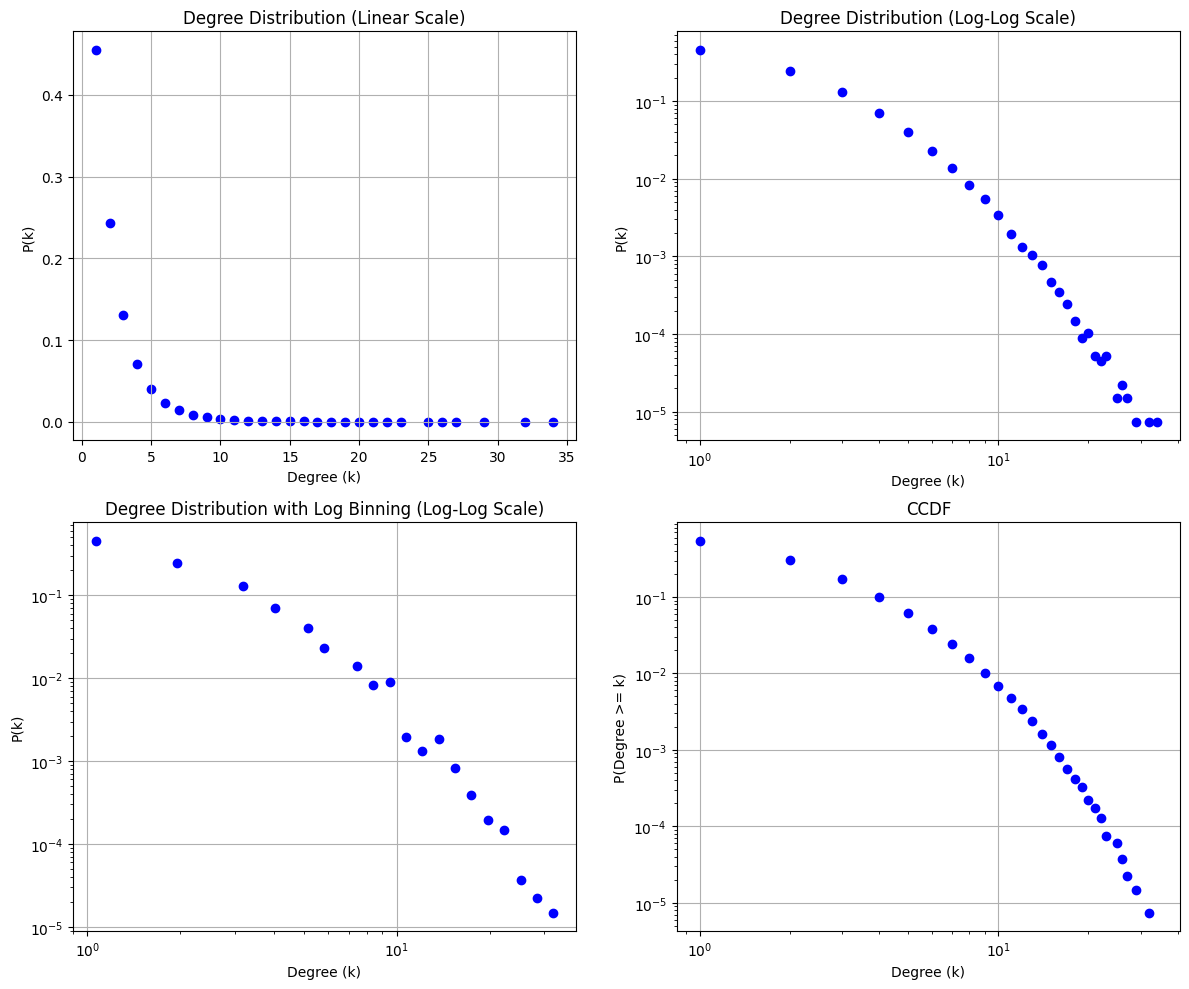

In [ ]:
def plot_degree_distribution(G):
    degrees = dict(G.degree()).values()
    degree_count = Counter(degrees)
    k_values = np.array(list(degree_count.keys()))
    k_probabilties = np.array([(x / len(degrees)) for x in degree_count.values()])

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    # Linear scale degree distribution
    ax1.scatter(k_values, k_probabilties, color='b')
    ax1.set_xlabel('Degree (k)')
    ax1.set_ylabel('P(k)')
    ax1.set_title('Degree Distribution (Linear Scale)')
    ax1.grid(True)

    # Log-log scale degree distribution
    ax2.loglog(k_values, k_probabilties, marker='o', linestyle = "None", color='b')
    ax2.set_xlabel('Degree (k)')
    ax2.set_ylabel('P(k)')
    ax2.set_title('Degree Distribution (Log-Log Scale)')
    ax2.grid(True)

    # Log-log scale with log binning degree distribution
    log_bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=30)
    hist, bin_edges = np.histogram(list(degrees), bins=log_bins, density=False)

    P_k = hist / sum(hist)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    ax3.loglog(bin_centers, P_k, marker='o', linestyle="None", color='b')
    ax3.set_xlabel('Degree (k)')
    ax3.set_ylabel('P(k)')
    ax3.set_title('Degree Distribution with Log Binning (Log-Log Scale)')
    ax3.grid(True)

    # complementary cumulative distribution function (CCDF)
    unique_degrees = np.sort(np.unique(list(degrees)))

    ccdf = []
    for k in unique_degrees:
        ccdf.append(np.sum(list(degrees) > k) / len(list(degrees)))

    ax4.loglog(unique_degrees, ccdf, marker='o', linestyle='None', color='b')
    ax4.set_xlabel('Degree (k)')
    ax4.set_ylabel('P(Degree >= k)')
    ax4.set_title('CCDF')
    ax4.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

plot_degree_distribution(coauthorship_graph)

In [ ]:
# To increase complexity, consider incorporating simple predictive models. For example,
# you could check if papers with multiple influential authors tend to receive more citations or if
# specific author characteristics (like centrality or interdisciplinary connections) predict citation counts.

# citation & h-index (use citation and h-index to predict other attributes of an author)
# (use all features to predict centrality)


# Future analysis should only be performed on the largest connected component
# authors_features_table = pd.read_csv(authors_features_path)
# authors_fields_table = pd.read_csv(authors_fields_path)
# coauthorship_table = pd.read_csv(coauthorship_path)

largest_component_G = get_largest_scc_from_graph(coauthorship_graph)

degree_centrality_gc = nx.degree_centrality(largest_component_G)
centrality_features_gc = pd.DataFrame({
    'Author ID': list(degree_centrality_gc.keys()),
    'degree_centrality': list(degree_centrality_gc.values()),
})

In [ ]:
# betweenness_centrality = calculate_betweenness_centrality(largest_component_G)
# betweenness_centrality
centrality_features_gc.head()

,Author ID,degree_centrality
0,rkKMIwMAAAAJ,0.000045
1,ZjDFiYsAAAAJ,0.000045
2,rcW8mi0AAAAJ,0.000034
3,n07X8FoAAAAJ,0.000067
4,TgGwQNIAAAAJ,0.000045


In [ ]:
# Merge centrality features with authors_features_table
author_features_gc = pd.merge(authors_features_table, centrality_features_gc, on='Author ID')
author_features_gc = pd.merge(author_features_gc, authors_fields_table, on='Author ID')
author_features_gc.head()

,Author ID,Institute ID,Citation Count,h-index,Gender,Country,degree_centrality,Field of Interest
0,rkKMIwMAAAAJ,4065822778065209794,1034,18,male,US,0.000045,Computer Science
1,TgGwQNIAAAAJ,16161526096496270291,2151,23,male,US,0.000045,Computer Science
2,T8rNctUAAAAJ,2453572853610168191,449,8,male,US,0.000011,"Economics, Econometrics and Finance"
3,pdqs_asAAAAJ,17315628399016810142,2110,16,male,IT,0.000022,Computer Science
4,cSSDPS4AAAAJ,5372903875391377695,1671,21,male,US,0.000067,Earth and Planetary Sciences


In [ ]:
# Perform Prediction:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Standardize the degree centrality and counts
X = author_features_gc[['Citation Count', 'h-index']]
y = author_features_gc['degree_centrality']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred_scaled = model.predict(X_test)

rmse_scaled = mean_squared_error(y_test, y_pred_scaled, squared=False)
print(f"RMSE (Scaled): {rmse_scaled}")

RMSE (Scaled): 0.06223334174852352


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
degree_centrality_dict = author_features_gc['degree_centrality'].value_counts().to_dict()

print(degree_centrality_dict)

{1.11765560560169e-05: 18909, 2.23531121120338e-05: 15561, 3.35296681680507e-05: 9933, 4.47062242240676e-05: 5973, 5.58827802800845e-05: 3616, 6.70593363361014e-05: 2140, 7.82358923921183e-05: 1359, 8.94124484481352e-05: 796, 0.00010058900450415209: 540, 0.000111765560560169: 334, 0.0001229421166161859: 195, 0.0001341186726722028: 140, 0.0001452952287282197: 109, 0.0001564717847842366: 76, 0.0001676483408402535: 50, 0.0001788248968962704: 37, 0.0001900014529522873: 23, 0.00020117800900830418: 16, 0.000223531121120338: 12, 0.0002123545650643211: 6, 0.0002570607892883887: 6, 0.00023470767717635488: 6, 0.0002458842332323718: 5, 0.0002905904574564394: 1, 0.0003800029059045746: 1, 0.0003576497937925408: 1, 0.0003017670135124563: 1, 0.0003241201256244901: 1}


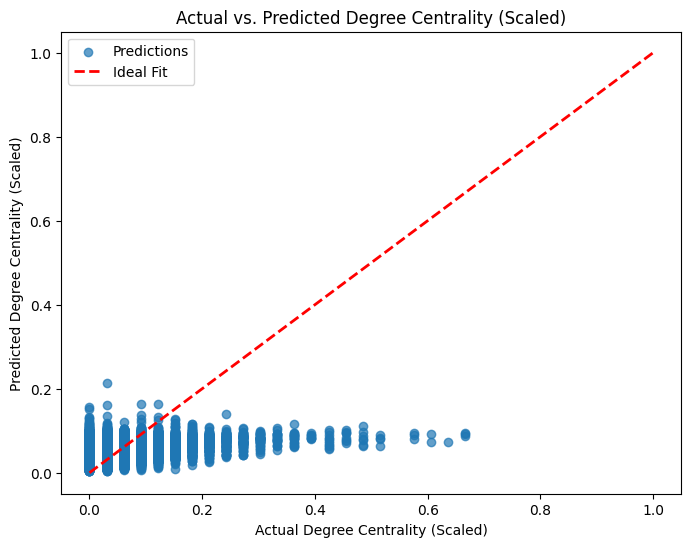

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_scaled, alpha=0.7, label='Predictions')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Degree Centrality (Scaled)')
plt.ylabel('Predicted Degree Centrality (Scaled)')
plt.title('Actual vs. Predicted Degree Centrality (Scaled)')
plt.legend()
plt.show()


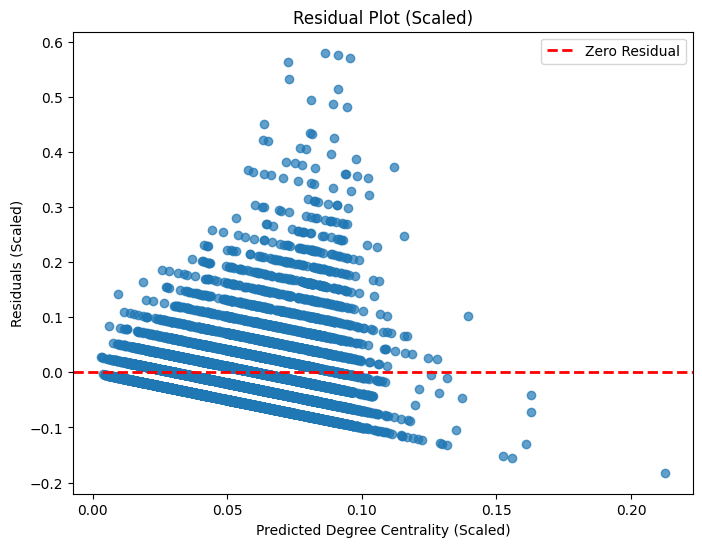

In [ ]:
# Residual plot
residuals = y_test - y_pred_scaled
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_scaled, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Residual')
plt.xlabel('Predicted Degree Centrality (Scaled)')
plt.ylabel('Residuals (Scaled)')
plt.title('Residual Plot (Scaled)')
plt.legend()
plt.show()

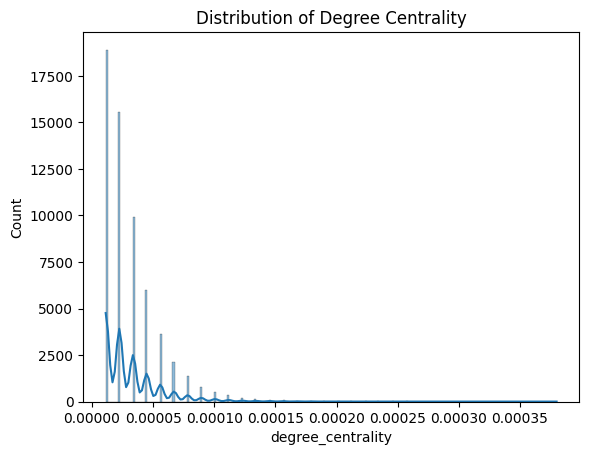

In [ ]:
sns.histplot(author_features_gc['degree_centrality'], kde=True)
plt.title('Distribution of Degree Centrality')
plt.show()

In [ ]:
author_features_gc['centrality_category'] = pd.qcut(
    author_features_gc['degree_centrality'], q=3, labels=['low', 'medium', 'high']
)

# Predict the categories instead of raw centrality
X = author_features_gc[['Citation Count', 'h-index']]
y = author_features_gc['centrality_category']

In [ ]:
author_features_gc.sort_values(by = "degree_centrality")

,Author ID,Institute ID,Citation Count,h-index,Gender,Country,degree_centrality,Field of Interest,centrality_category
45674,DYLCbLwAAAAJ,16341676647469683797,380,11,male,BR,0.000011,"Business, Management and Accounting",low
15848,VhIOTvcAAAAJ,8359563063191942633,144,5,female,KR,0.000011,Physics and Astronomy,low
33341,AENRMt4AAAAJ,13860336253325434807,973,12,male,GB,0.000011,Health Professions,low
33342,eK9bL18AAAAJ,11265751085564418275,707,14,male,JP,0.000011,Medicine,low
15845,5ydQnC0AAAAJ,101660862957307803,3393,19,female,CN,0.000011,Mathematics,low
...,...,...,...,...,...,...,...,...,...
3098,2IbMjzgAAAAJ,10636975903425199880,1384,17,male,PT,0.000291,Computer Science,high
21527,QY-earAAAAAJ,7850573633115918505,11199,52,male,DK,0.000302,Computer Science,high
25547,hiQnvicAAAAJ,10568258639230347370,4419,34,male,TR,0.000324,Computer Science,high
21306,TxKNCSoAAAAJ,16354744476947292444,36675,86,male,DE,0.000358,Computer Science,high


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2551.124163578147


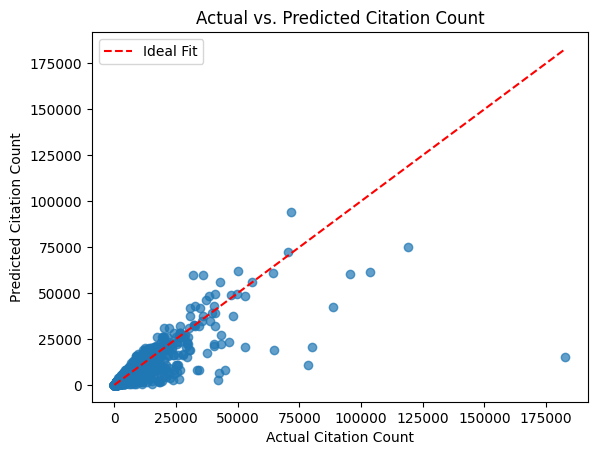

In [ ]:
# Using h-index to predict citation count
X = author_features_gc[['h-index']]
y = author_features_gc['Citation Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Citation Count')
plt.ylabel('Predicted Citation Count')
plt.title('Actual vs. Predicted Citation Count')
plt.legend()
plt.show()


3. Predict Field of Interest:
Predict an author's primary field of interest using their Citation Count and h-index

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

author_features_gc['Field of Interest'] = author_features_gc['Field of Interest'].fillna('Unknown')

X = author_features_gc[['Citation Count', 'h-index']]
y = author_features_gc['Field of Interest']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predict and Evaluation
y_pred = model.predict(X_test)
test_classes = sorted(set(y_test))
print(classification_report(y_test, y_pred, target_names=[le.classes_[i] for i in test_classes]))

                                              precision    recall  f1-score   support

                       Aerospace Engineering       0.00      0.00      0.00        16
        Agricultural and Biological Sciences       0.11      0.11      0.11      1224
                         Arts and Humanities       0.03      0.02      0.03       212
                      Automotive Engineering       0.00      0.00      0.00         2
Biochemistry, Genetics and Molecular Biology       0.06      0.04      0.05       404
                      Biomedical Engineering       0.00      0.00      0.00        39
                   Building and Construction       0.00      0.00      0.00        58
         Business, Management and Accounting       0.05      0.04      0.04       455
                        Chemical Engineering       0.04      0.04      0.04       312
                                   Chemistry       0.00      0.00      0.00       106
            Civil and Structural Engineering       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


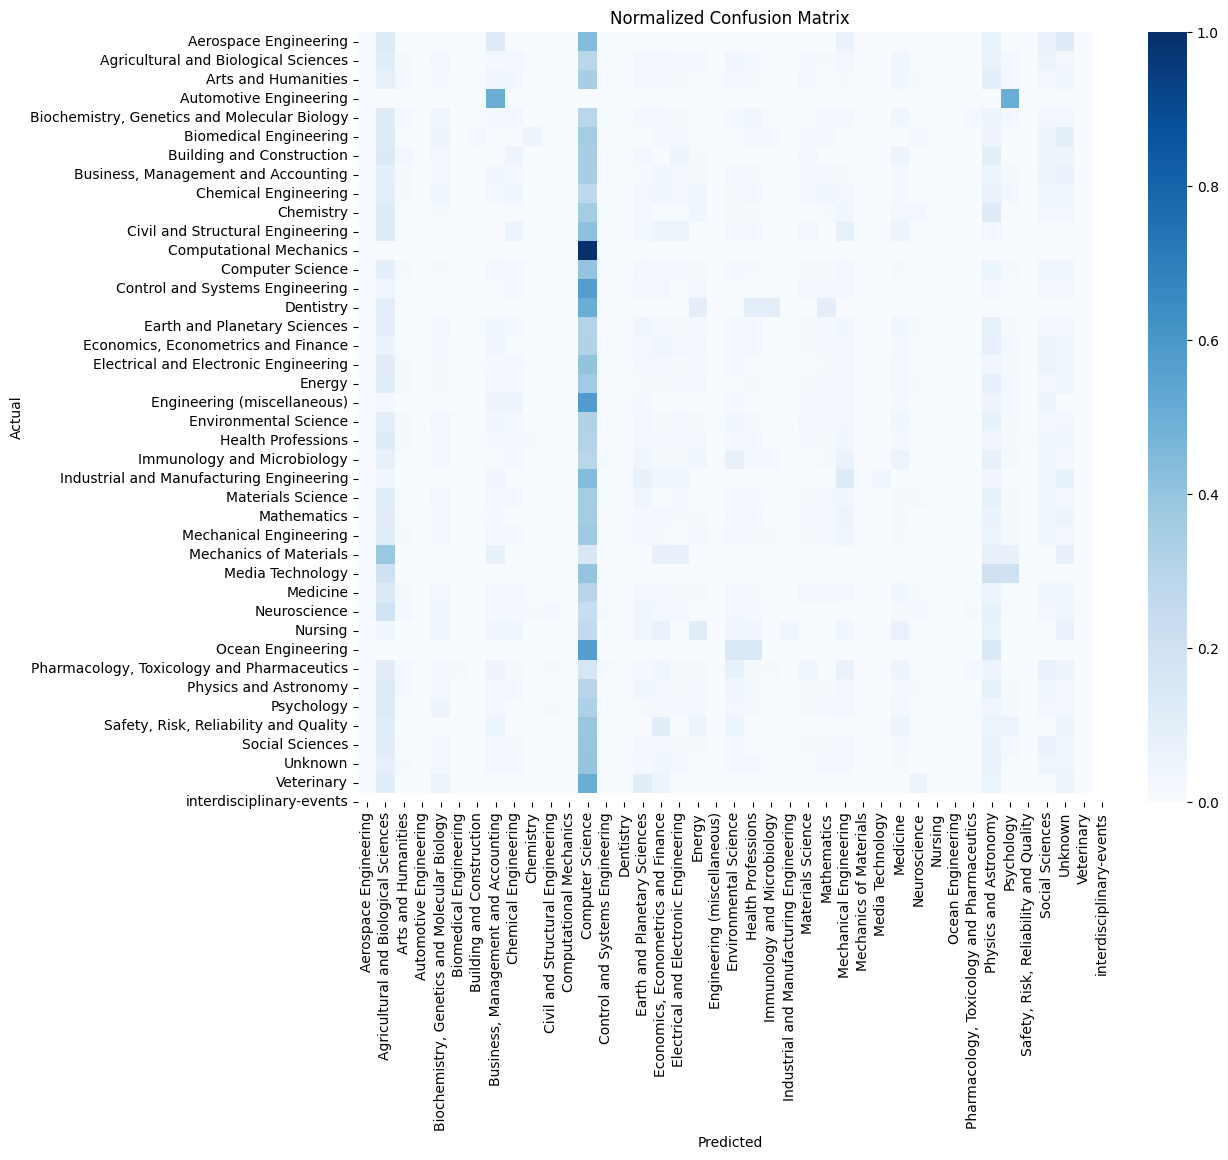

In [ ]:
# Create confusion matrix to evaluate prediction results
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()


4. Predict author collaboration with common_neighbors, jaccard coefficient, adamic adar index, preferential_attachment score
common_neighbors: number of common neighbors between the two selected nodes: node1 and node 2
jaccard coefficient: a similarity metric that is basically calculating number of common neighbors / total number of unique neighbors of both nodes
Adamic adar index: weighted common neighbors based on node degree
preferential attachment score: degree of node1 * degree of node2


In [ ]:
positive_samples = pd.DataFrame(list(largest_component_G.edges), columns=['Author ID 1', 'Author ID 2'])
positive_samples['label'] = 1

In [ ]:
positive_samples

,Author ID 1,Author ID 2,label
0,rkKMIwMAAAAJ,ZjDFiYsAAAAJ,1
1,rkKMIwMAAAAJ,rcW8mi0AAAAJ,1
2,rkKMIwMAAAAJ,n07X8FoAAAAJ,1
3,rkKMIwMAAAAJ,MByiqzUAAAAJ,1
4,ZjDFiYsAAAAJ,_L5UficAAAAJ,1
...,...,...,...
121712,zY4iJFoAAAAJ,18CtCvAAAAAJ,1
121713,7cwP-wSjaXgC,18IPbrAAAAAJ,1
121714,avCjkxIAAAAJ,oPD0Np8AAAAJ,1
121715,a4XJ3coAAAAJ,qkT4LkMAAAAJ,1


In [ ]:
# Generate a subset of non-edges
import random

num_samples = 500000  # number of samples to random sample from the number of edges
nodes = list(largest_component_G.nodes)
sampled_non_edges = []

while len(sampled_non_edges) < num_samples:
    u, v = random.sample(nodes, 2)
    if not largest_component_G.has_edge(u, v):
        sampled_non_edges.append((u, v))

# Convert the sampled edges to a DF
negative_samples = pd.DataFrame(sampled_non_edges, columns=['Author ID 1', 'Author ID 2'])
negative_samples['label'] = 0

In [ ]:
negative_samples

,Author ID 1,Author ID 2,label
0,KBL89LsAAAAJ,Fz1w4b8AAAAJ,0
1,wd6rv1cAAAAJ,i_kgZXAAAAAJ,0
2,nM5oLd0AAAAJ,jDKUfN4AAAAJ,0
3,Euak-GgAAAAJ,7riI11gAAAAJ,0
4,_NI2YjIAAAAJ,R3miBdoAAAAJ,0
...,...,...,...
499995,dVFcJyYAAAAJ,W-VBck4AAAAJ,0
499996,89a-n3YAAAAJ,zBQiAAcAAAAJ,0
499997,0fvrdOkAAAAJ,RjWyzUwAAAAJ,0
499998,ixkiakMAAAAJ,iUobcdYAAAAJ,0


In [ ]:
# Combine positive and negative samples into a single DF
link_samples = pd.concat([positive_samples, negative_samples], ignore_index=True)
link_samples.head()

,Author ID 1,Author ID 2,label
0,rkKMIwMAAAAJ,ZjDFiYsAAAAJ,1
1,rkKMIwMAAAAJ,rcW8mi0AAAAJ,1
2,rkKMIwMAAAAJ,n07X8FoAAAAJ,1
3,rkKMIwMAAAAJ,MByiqzUAAAAJ,1
4,ZjDFiYsAAAAJ,_L5UficAAAAJ,1


In [ ]:
# ------- Helper function that calculates metrics between two nodes in a graph -------
def compute_graph_features(graph, node1, node2):
    common_neighbors = len(list(nx.common_neighbors(graph, node1, node2)))
    jaccard = list(nx.jaccard_coefficient(graph, [(node1, node2)]))[0][2]
    adamic_adar = list(nx.adamic_adar_index(graph, [(node1, node2)]))[0][2]
    preferential_attachment = list(nx.preferential_attachment(graph, [(node1, node2)]))[0][2]
    return pd.Series({
        'common_neighbors': common_neighbors,
        'jaccard': jaccard,
        'adamic_adar': adamic_adar,
        'preferential_attachment': preferential_attachment
    })

link_samples[['common_neighbors', 'jaccard', 'adamic_adar', 'preferential_attachment']] = link_samples.apply(
    lambda row: compute_graph_features(largest_component_G, row['Author ID 1'], row['Author ID 2']),
    axis=1
)

# Add additional node attribute features (e.g., differences in Citation Count and h-index)
link_samples = link_samples.merge(
    author_features_gc.set_index('Author ID')[['Citation Count', 'h-index']],
    left_on='Author ID 1', right_index=True
).rename(columns={'Citation Count': 'Citation 1', 'h-index': 'h-index 1'})

link_samples = link_samples.merge(
    author_features_gc.set_index('Author ID')[['Citation Count', 'h-index']],
    left_on='Author ID 2', right_index=True
).rename(columns={'Citation Count': 'Citation 2', 'h-index': 'h-index 2'})

link_samples['citation_diff'] = abs(link_samples['Citation 1'] - link_samples['Citation 2'])
link_samples['h-index_diff'] = abs(link_samples['h-index 1'] - link_samples['h-index 2'])


In [ ]:
link_samples.head()


,Author ID 1,Author ID 2,label,common_neighbors,jaccard,adamic_adar,preferential_attachment,Citation 1,h-index 1,Citation 2,h-index 2,citation_diff,h-index_diff
1,rkKMIwMAAAAJ,rcW8mi0AAAAJ,1,1.0,0.166667,1.442695,12.0,1034,18,153,4,881,14
2,rkKMIwMAAAAJ,n07X8FoAAAAJ,1,0.0,0.000000,0.000000,24.0,1034,18,1391,20,357,2
3,rkKMIwMAAAAJ,MByiqzUAAAAJ,1,1.0,0.200000,0.910239,8.0,1034,18,1016,11,18,7
8,rcW8mi0AAAAJ,MByiqzUAAAAJ,1,1.0,0.250000,0.721348,6.0,153,4,1016,11,863,7
9,n07X8FoAAAAJ,P9JQOi8AAAAJ,1,0.0,0.000000,0.000000,6.0,1391,20,1054,17,337,3


In [ ]:
# Select features and target
X = link_samples[['common_neighbors', 'jaccard', 'adamic_adar', 'preferential_attachment', 'citation_diff', 'h-index_diff']]
y = link_samples['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     44870
           1       0.56      0.47      0.51     12015

    accuracy                           0.81     56885
   macro avg       0.71      0.69      0.70     56885
weighted avg       0.80      0.81      0.81     56885



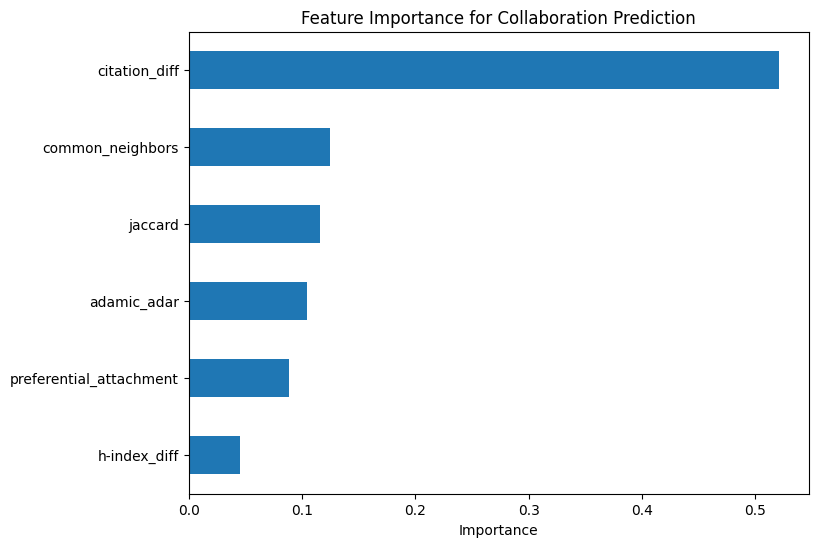

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Importance')
plt.title('Feature Importance for Collaboration Prediction')
plt.show()
